In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

### 平均の標本分布

In [4]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [4]:
m = 100
n = 50
column = 'tip'
sample_means = []

for i in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_means.append(sample_mean)

In [7]:
# 平均
np.mean(sample_means)

2.9862040000000007

In [9]:
# 母平均
df[column].mean()

2.99827868852459

In [11]:
# 分散
np.var(sample_means)

0.02790502318400002

In [12]:
# 母分散/n
np.var(df[column])/n


0.038132170249932824

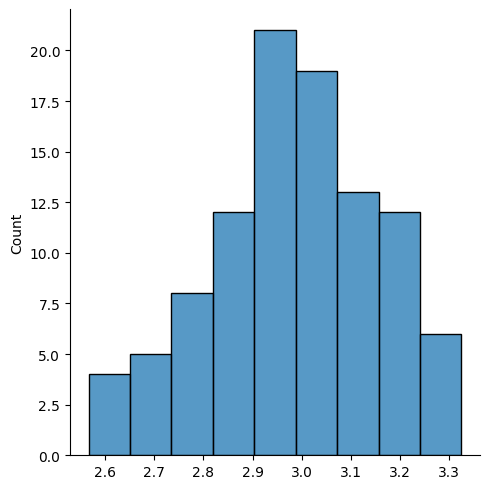

In [6]:
sns.displot(sample_means)

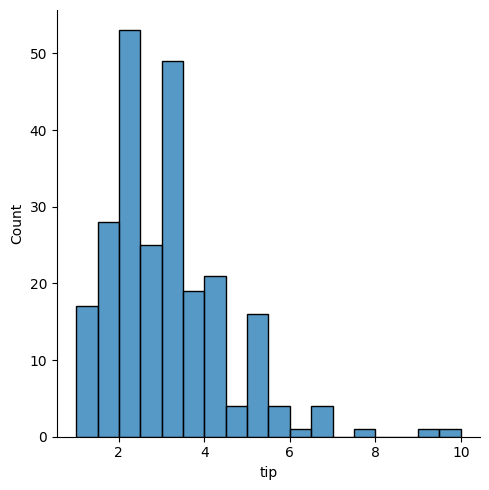

In [14]:
sns.displot(df[column])

### 不偏分散

In [15]:
stats.tvar(df['tip'])

1.914454638062471

In [17]:
np.var(df['tip'], ddof=1)

1.914454638062471

In [18]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [19]:
stats.tstd(df['tip'])

1.3836381890011822

In [20]:
np.std(df['tip'], ddof=1)

1.3836381890011822

### 不偏分散の不偏性

In [16]:
m = 1000
n = 50
column = 'tip'
sample_vars = [] # 空のリストを用意
sample_tvars = []

for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_vars.append(sample_var)
    sample_tvar = np.var(sample_df[column], ddof=1)
    sample_tvars.append(sample_tvar)

In [17]:
# 標本の分散の平均
np.mean(sample_vars)

1.8788239644

In [18]:
# 標本の不偏分散の平均
np.mean(sample_tvars)

1.917167310612245

In [19]:
# 母分散
np.var(df[column])

1.9066085124966412